In [2]:
library(tidyverse)

Warning message:
"package 'ggplot2' was built under R version 4.4.3"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Simple Linkage

In [5]:
A <- c(0,9,3,6,11)
B <- c(9,0,7,5,10)
C <- c(3, 7, 0, 9, 2)
D <- c(6, 5, 9, 0, 8 )
E <- c(11, 10, 2, 8, 0)

df <- data.frame(A,B,C,D,E, row.names = c("A","B","C","D","E"))
# df %>% knitr::kable(format = "html")
mat_dist <- as.dist(df)

df

,A,B,C,D,E
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,0,9,3,6,11
B,9,0,7,5,10
C,3,7,0,9,2
D,6,5,9,0,8
E,11,10,2,8,0


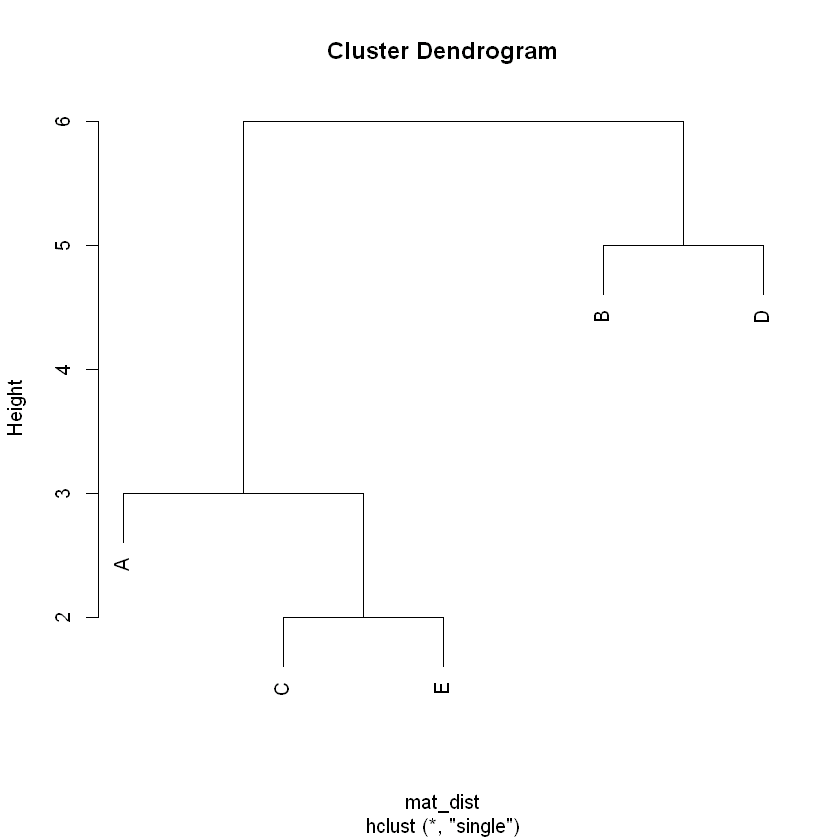

In [6]:
cluster_single <- hclust(mat_dist,method='single')
plot(cluster_single)

## Complete Linkage

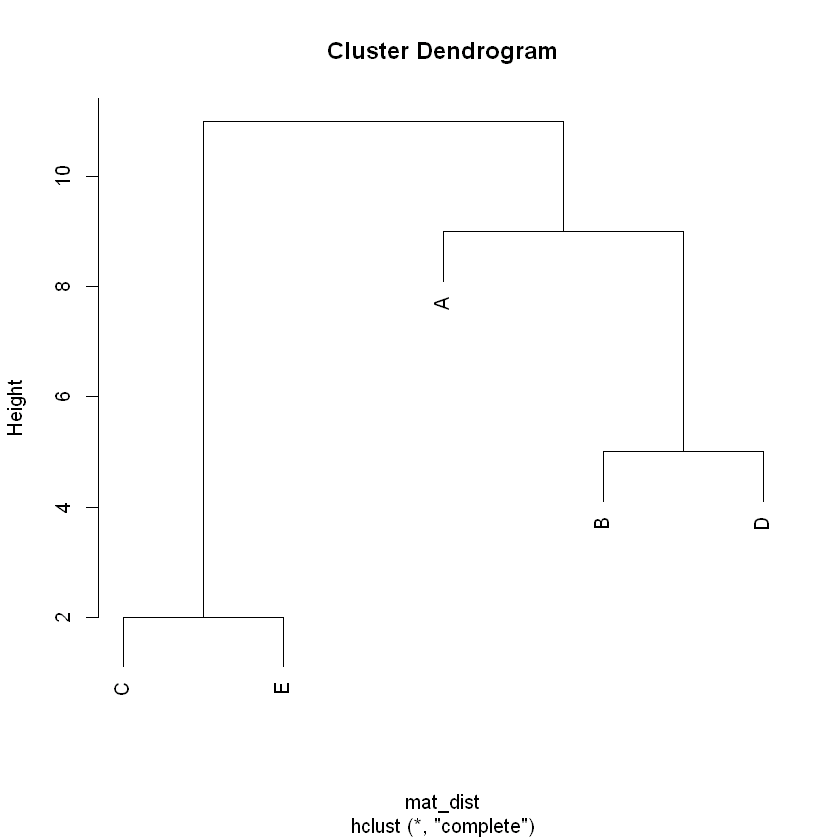

In [ ]:
cluster_complete <- hclust(mat_dist,method='complete')
plot(cluster_complete)

## Average Linkage

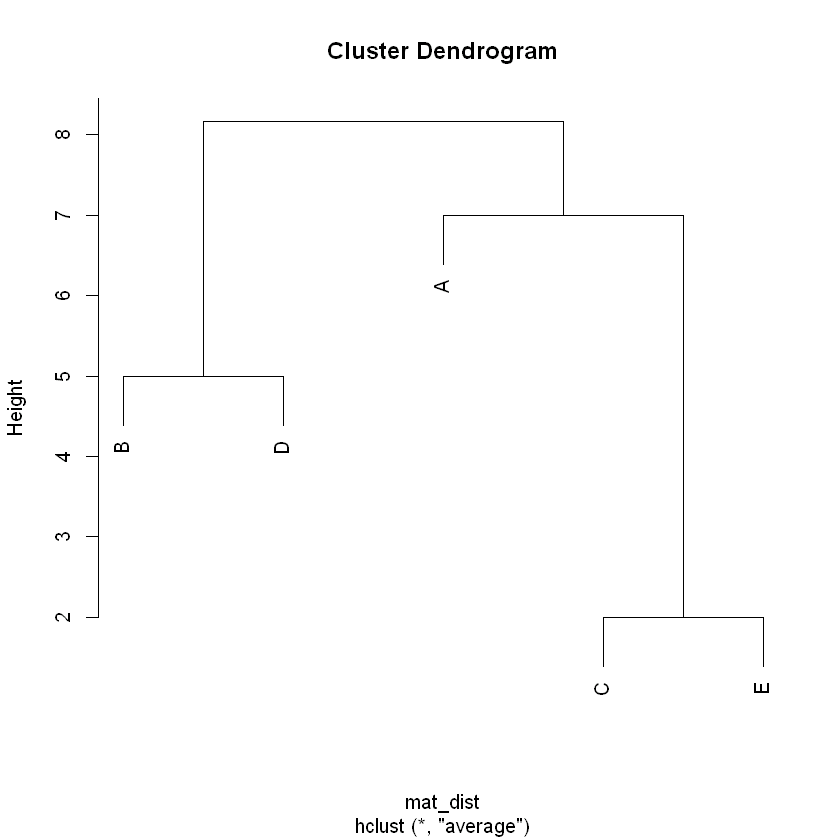

In [ ]:
cluster_average <- hclust(mat_dist,method='average')
plot(cluster_average)

## Ward Linkage

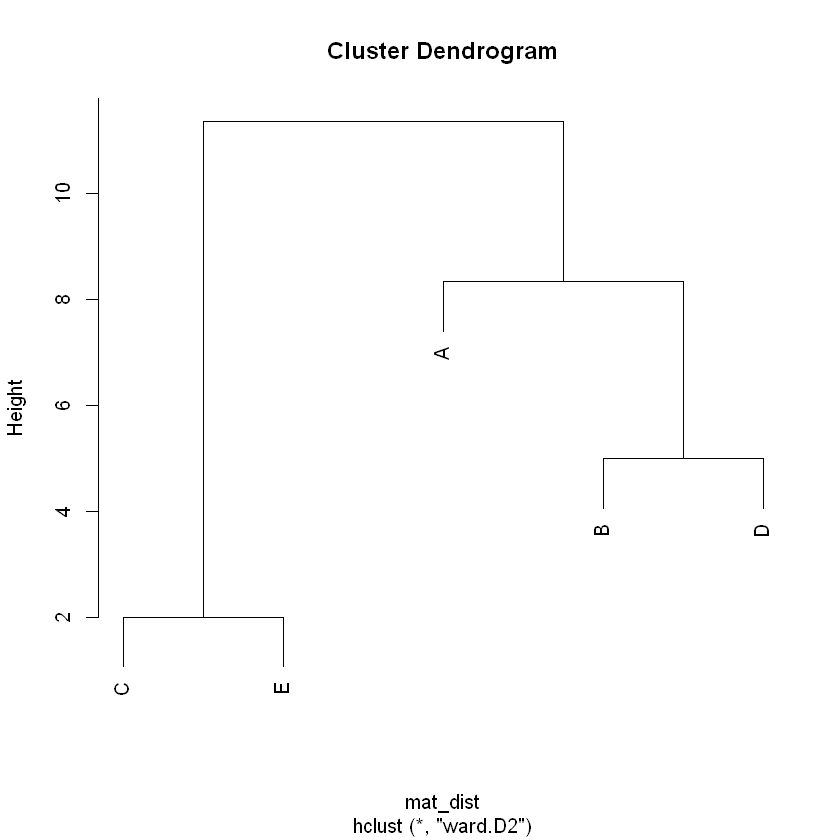

In [14]:
cluster_ward <- hclust(mat_dist,method='ward.D2')
plot(cluster_ward)

## Coeficiente de Correlación de Cofenético

In [16]:
install.packages("purrr")
install.packages("kableExtra")

Warning message:
"package 'purrr' is in use and will not be installed"
Installing package into 'C:/Users/alexi/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'systemfonts', 'svglite'




package 'systemfonts' successfully unpacked and MD5 sums checked
package 'svglite' successfully unpacked and MD5 sums checked
package 'kableExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alexi\AppData\Local\Temp\RtmpYFUeQs\downloaded_packages


In [17]:
library(purrr)
library(kableExtra)

Warning message:
"package 'kableExtra' was built under R version 4.4.3"



Attaching package: 'kableExtra'


The following object is masked from 'package:dplyr':

    group_rows




In [18]:
m <- c( "average", "single", "complete", "ward.D2", "median", "centroid")
names(m) <- c( "average", "single", "complete", "ward.D2", "median", "centroid")

In [24]:
coef_cor <- function(x) {
  cor(x=mat_dist, cophenetic(hclust(d=mat_dist, method = x)))
}
# Tabla comparativa
coef_tabla <- map_dbl(m, coef_cor) 

kbl(coef_tabla, booktabs = TRUE, align = "c",
    caption = "Cuadro comparativo de los coeficientes de correlación",
    col.names = rownames(coef_tabla)) %>%
  kable_styling(position = "center",
                latex_options = c("repeat_header", "hold_position"),
                font_size = 9) %>%
  add_header_above(c("Método", "Coeficiente de correlación"))

<table class="table" style="font-size: 9px; margin-left: auto; margin-right: auto;">
<thead><tr>
<th style="border-bottom:hidden;padding-bottom:0; padding-left:3px;padding-right:3px;text-align: center; " colspan="1"><div style="border-bottom: 1px solid #ddd; padding-bottom: 5px; ">Método</div></th>
<th style="border-bottom:hidden;padding-bottom:0; padding-left:3px;padding-right:3px;text-align: center; " colspan="1"><div style="border-bottom: 1px solid #ddd; padding-bottom: 5px; ">Coeficiente de correlación</div></th>
</tr></thead>
<caption style="font-size: initial !important;">Cuadro comparativo de los coeficientes de correlación</caption>
<tbody>
  <tr>
   <td style="text-align:left;"> average </td>
   <td style="text-align:center;"> 0.6816035 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> single </td>
   <td style="text-align:center;"> 0.5139962 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> complete </td>
   <td style="text-align:center;"> 0.6521790 </td>
  </tr>
  <t